# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

Load the `id -> name` mapping from `signnames.csv`:

In [4]:
import csv

with open('signnames.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    id2name = {int(row['ClassId']): row['SignName'] for row in reader}

Plot some traffic sign images:

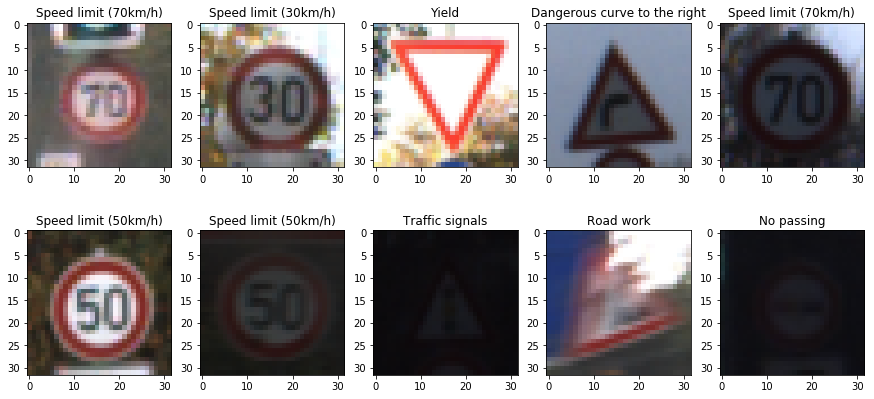

In [5]:
import random

# randomly plot 10 images with 5 in a row
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for row in axes:
    for axis in row:
        idx = random.randint(0, n_train - 1)
        img, name = X_train[idx, ...], id2name[y_train[idx]]    
        
        axis.imshow(img)
        axis.set_title(name)

plt.show()

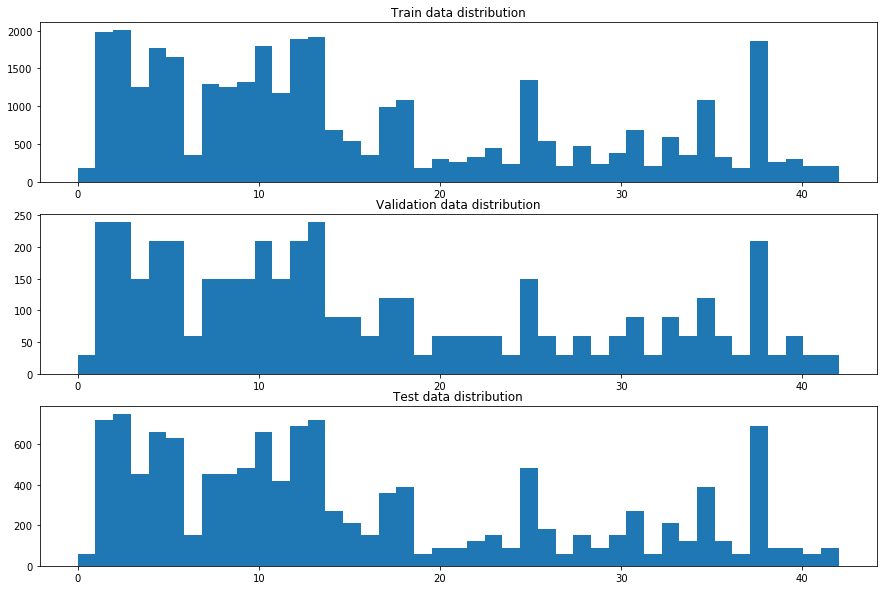

In [6]:
# plot distribution of train, valid and test data
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

axes[0].hist(y_train, bins=n_classes)
axes[0].set_title('Train data distribution')

axes[1].hist(y_valid, bins=n_classes)
axes[1].set_title('Validation data distribution')

axes[2].hist(y_test, bins=n_classes)
axes[2].set_title('Test data distribution')

plt.show()

The graph shows that distribution of traffic signs are similiar between training, validation and testing set. And 5 most or least common traffic signs in training data are:

In [7]:
from collections import Counter

c = Counter(y_train)
print('Most common five:')
for cid, cnt in c.most_common(5):
    print('  {:.2f}%, {} images --- {}'.format(cnt / n_train * 100, cnt, id2name[cid]))

print('\nLeast common five:')
for cid, cnt in c.most_common()[-5:]:
    print('  {:.2f}%, {} images --- {}'.format(cnt / n_train * 100, cnt, id2name[cid]))

Most common five:
  5.78%, 2010 images --- Speed limit (50km/h)
  5.69%, 1980 images --- Speed limit (30km/h)
  5.52%, 1920 images --- Yield
  5.43%, 1890 images --- Priority road
  5.34%, 1860 images --- Keep right

Least common five:
  0.60%, 210 images --- End of no passing
  0.60%, 210 images --- End of no passing by vehicles over 3.5 metric tons
  0.52%, 180 images --- Speed limit (20km/h)
  0.52%, 180 images --- Dangerous curve to the left
  0.52%, 180 images --- Go straight or left


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#####  Apply grayscale   
Using grayscale will lose information about the color but make it easier for the network to learn. The information carried in grayscale image is enough for the classification task since it can still get high accuracy with grayscale. After a couple of trials, I decide to apply grayscale since it's easier to learn and computationally cheaper.

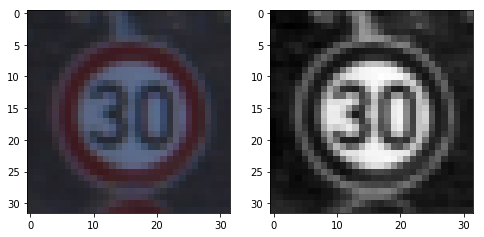

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

sample = X_train[4008]
gray = rgb2gray(sample)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(sample)
axes[1].imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [9]:
# apply convertion to all images
X_train = rgb2gray(X_train)
X_valid = rgb2gray(X_valid)
X_test = rgb2gray(X_test)

# expand dim to feed into neural network
X_train = np.expand_dims(X_train, axis=3)
X_valid = np.expand_dims(X_valid, axis=3)
X_test = np.expand_dims(X_test, axis=3)

##### Apply Normalization  
Normalization helps the nerwork converge, here I normalize the pixel value roughly between -1 and 1.

In [10]:
X_train = (X_train - 128) / 128
X_valid = (X_valid - 128) / 128
X_test  = (X_test  - 128) / 128

### Model Architecture

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import batch_norm
from tensorflow.contrib.layers import conv2d
from tensorflow.contrib.layers import dropout
from tensorflow.contrib.layers import flatten
from tensorflow.contrib.layers import fully_connected
from tensorflow.contrib.layers import l2_regularizer
from tensorflow.contrib.layers import max_pool2d
from tensorflow.contrib.layers import variance_scaling_initializer

X = tf.placeholder(tf.float32, shape=(None, 32, 32, 1), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

#### Model
The model is based with on LeNet with following changes:  

##### change the size of fully-connected layer to 1024
Since the num of classes increases from 10 to 43 so the original sizes of 120, 80 may not have enough 
learning capicity, so I increased both sizes to 1024.  

##### change the weight initial method to xavier
This change targets at gradient explode/vanish problem. It's introduced in this [paper](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) 
and reduce the problem by making input variance same as output variance of each layer. And it's
the default weight initializer of `tf.layers.conv2d`.

#### apply batch normalization to convolution and fully-connected layers
This one speeds up learning and also acts as a regularizer. It's introduced in this [paper](https://arxiv.org/pdf/1502.03167v3.pdf).
The technique consists of adding an operation in the model 
just before the activation function of each layer, simply zero-centering and normalizing the inputs, 
then scaling and shifting the result using two new parameters per layer (one for scaling, the other for shifting)
It makes each layer learn from previous layer 
with a relatively fixed distribution than a moving target. 

#### change activation function to elu for fully-connected layers
`elu` is introduced in this [paper](https://arxiv.org/pdf/1511.07289v5.pdf) and author show that 
it outperform all ReLU variants in their experiments. After some trials, I find it doesn't work very well
with on conv layer. But when applied to only fc layer it provides a higher validation accuracy so I
only apply it to fc layers.

#### apply dropout to fully-connected layers except for the last one
#### apply l2 regularization to convolution and fully-connected layers
The last two was applied after I tried the model some times and find that the model is overfitting.
Dropout randomly ignore some nodes in a layer. It makes network can't rely on a specific input and become like
an ensemble of different sub-networks. Regularization makes weights smaller and both make the network 
generalize more. After trials, I end up with a 0.5 dropout rate and 1e-5 regularization param. 


In [12]:
reg_constant = 1e-5
is_training = tf.placeholder(tf.bool, shape=(), name='is_training')
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')
bn_params = {
    'is_training': is_training,
    'decay': 0.99,
    'updates_collections': None
}

with tf.name_scope('model'):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(inputs=X,
                   num_outputs=6,
                   kernel_size=(5, 5),
                   stride=(1, 1),
                   padding='valid',
                   weights_regularizer=l2_regularizer(scale=reg_constant),
                   normalizer_fn=batch_norm,
                   normalizer_params=bn_params,
                   activation_fn=tf.nn.relu,
                   scope='conv1')

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = max_pool2d(conv1, kernel_size=(2, 2))

    # Convolutional. Output = 10x10x16.
    conv2 = conv2d(inputs=conv1,
                   num_outputs=16,
                   kernel_size=(5, 5),
                   stride=(1, 1),
                   padding='valid',
                   weights_regularizer=l2_regularizer(scale=reg_constant),
                   normalizer_fn=batch_norm,
                   normalizer_params=bn_params,
                   activation_fn=tf.nn.relu,
                   scope='conv2')
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = max_pool2d(conv2, kernel_size=(2, 2))

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 1024.
    fc1 = fully_connected(fc0, 1024, 
                          activation_fn=tf.nn.elu,
                          weights_regularizer=l2_regularizer(scale=reg_constant),
                          normalizer_fn=batch_norm,
                          normalizer_params=bn_params, 
                          scope='fc1')
    fc1 = dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2 = fully_connected(fc1, 1024, 
                          activation_fn=tf.nn.elu,
                          weights_regularizer=l2_regularizer(scale=reg_constant),
                          normalizer_fn=batch_norm,
                          normalizer_params=bn_params, 
                          scope='fc2')
    fc2 = dropout(fc1, keep_prob)
    
    # Layer 5: Fully Connected. Input = 1024. Output = 43.
    logits = fully_connected(fc2, 43, 
                          activation_fn=None,
                          weights_regularizer=l2_regularizer(scale=reg_constant),
                          normalizer_fn=batch_norm,
                          normalizer_params=bn_params, 
                          scope='fc3')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
learning_rate = 0.001
n_epochs = 50
batch_size = 64

In [14]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([tf.reduce_mean(xentropy)] + reg_losses, name='loss')
    correct_prediction = tf.equal(y, tf.argmax(logits, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

Here I define the loss using `sparse_softmax_cross_entropy_with_logits` so I don't have to do the one-hot encoding, and also collect the regularization loss to add into total loss.

In [15]:
with tf.name_scope('train'):
    global_step = tf.Variable(0, name='global_step', trainable=False)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss, global_step=global_step)

I choose the adam optimizer since it has both advantages of momentum and rmsprop and also define a `global_step` variable for later use in writing summary.

In [16]:
from datetime import datetime

now = datetime.now().strftime('%Y%m%d%H%M%S')
root_log_dir = 'tf_logs'

def get_log_dir(name):
    return '{}/{}-run-{}/'.format(root_log_dir, name, now)

log_dir = get_log_dir('traffic-sign')

A helper to generate log directory name with timestamp for multiple runs.

In [17]:
with tf.name_scope('helpers'):
    init = tf.global_variables_initializer()

    writer = tf.summary.FileWriter(logdir=log_dir, graph=tf.get_default_graph())
    training_loss_summary = tf.summary.scalar('training_loss', loss)
    validation_loss_summary = tf.summary.scalar('validation_loss', loss)
    training_acc_summary = tf.summary.scalar('training_acc', accuracy)
    validation_acc_summary = tf.summary.scalar('validation_acc', accuracy)

    saver = tf.train.Saver()

Helpers including init operation, tensorboard logging and model saver.

In [18]:
from dataset import DataSet

def train_model():
    global batch_size
    
    # a helper like tf.contrib.data.Dataset but allow to be initialized with numpy arrays
    train = DataSet(X_train, y_train, reshape=False)

    with tf.Session() as sess:
        init.run()

        max_valid_acc, chosen_step = 0, 0
        for epoch in range(n_epochs):
            
            if max_valid_acc > 0.93:
                batch_size = 512
            
            for iteration in range(train.num_examples // batch_size):
                step = global_step.eval()

                X_batch, y_batch = train.next_batch(batch_size)
                _, train_loss_summ, train_acc_summ = sess.run(
                    [training_op, training_loss_summary, training_acc_summary],
                    feed_dict={is_training: True, keep_prob: 0.5,X: X_batch, y: y_batch})
                writer.add_summary(train_loss_summ, step)
                writer.add_summary(train_acc_summ, step)

                # log valid loss and acc every 10 steps and save the best model
                if step % 10 == 0:
                    valid_acc, validation_loss_summ, validation_acc_summ = sess.run(
                        [accuracy, validation_loss_summary, validation_acc_summary],
                        feed_dict={is_training: False, keep_prob: 1.0, X: X_valid, y: y_valid})
                    writer.add_summary(validation_loss_summ, step)
                    writer.add_summary(validation_acc_summ, step)

                    if valid_acc > max_valid_acc:
                        max_valid_acc = valid_acc
                        chosen_step = step
                        saver.save(sess, './tmp/model.ckpt')

        print('chosen interval:', chosen_step, ' validation accuracy:', max_valid_acc)

In [19]:
train_model()

chosen interval: 4220  validation accuracy: 0.973696


Here I use the tensorboard to keep track of the training, compute validation accuracy every 10 step and save the best one. The final validation accuracy is 97.37%. To make balance between speed and accuracy, I choose batch size to be 64 and set it 512 after the validation accuracy is greater than 93%.

![tensorboard_scalar](./examples/tensorboard_scalar.png)

Restore the saved model and run against testing data:

In [25]:
with tf.Session() as sess:
    saver.restore(sess, './tmp/model.ckpt')
    acc = accuracy.eval(feed_dict={is_training: False, keep_prob: 1.0, X: X_test, y: y_test})
    print('Accuracy on testing data:', acc)

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
Accuracy on testing data: 0.959383


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Here I will use images from test data since downloading and croping the image from web is a little tedious. And my model is trained on training and validation data, so it's fine to treat test data as new images.

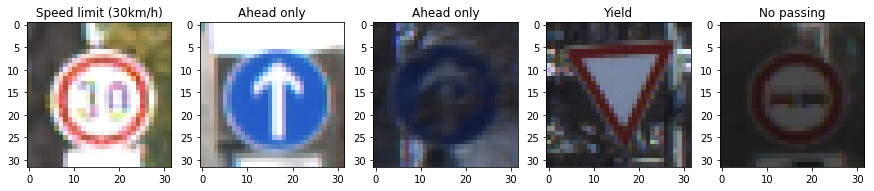

In [29]:
X_test, y_test = test['features'], test['labels']
indices = [random.randint(0, n_test - 1) for _ in range(5)]

fig, axes = plt.subplots(1, 5, figsize=(15, 7))
for i in range(5):
    idx = indices[i]
    img, name = X_test[idx, ...], id2name[y_test[idx]]    
        
    axes[i].imshow(img)
    axes[i].set_title(name)

plt.show()

### Predict the Sign Type for Each Image

In [31]:
# preprocess the images
images = X_test[indices, ...]
images = rgb2gray(images)
images = np.expand_dims(images, axis=3)

In [32]:
# restore the model and feed it with the images
with tf.Session() as sess:
    saver.restore(sess, './tmp/model.ckpt')
    
    label = tf.argmax(logits, 1)
    labels = label.eval(feed_dict={is_training: False, keep_prob: 1.0, X: images})

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt


In [37]:
for predict_id, correct_id in zip(labels, y_test[indices]):
    print('[{:22s}] is predicted as [{}]'.format(id2name[correct_id], id2name[predict_id]))

[Speed limit (30km/h)  ] is predicted as [Speed limit (30km/h)]
[Ahead only            ] is predicted as [Ahead only]
[Ahead only            ] is predicted as [Ahead only]
[Yield                 ] is predicted as [Yield]
[No passing            ] is predicted as [No passing]


### Analyze Performance

In [39]:
acc = sum(y_test[indices[i]] == labels[i] for i in range(5)) / 5
print('Accuracy on the 5 images:', acc)

Accuracy on the 5 images: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [49]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# restore the model and feed it with the images
with tf.Session() as sess:
    saver.restore(sess, './tmp/model.ckpt')
    
    values, cids = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={is_training: False, keep_prob: 1.0, X: images})

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt


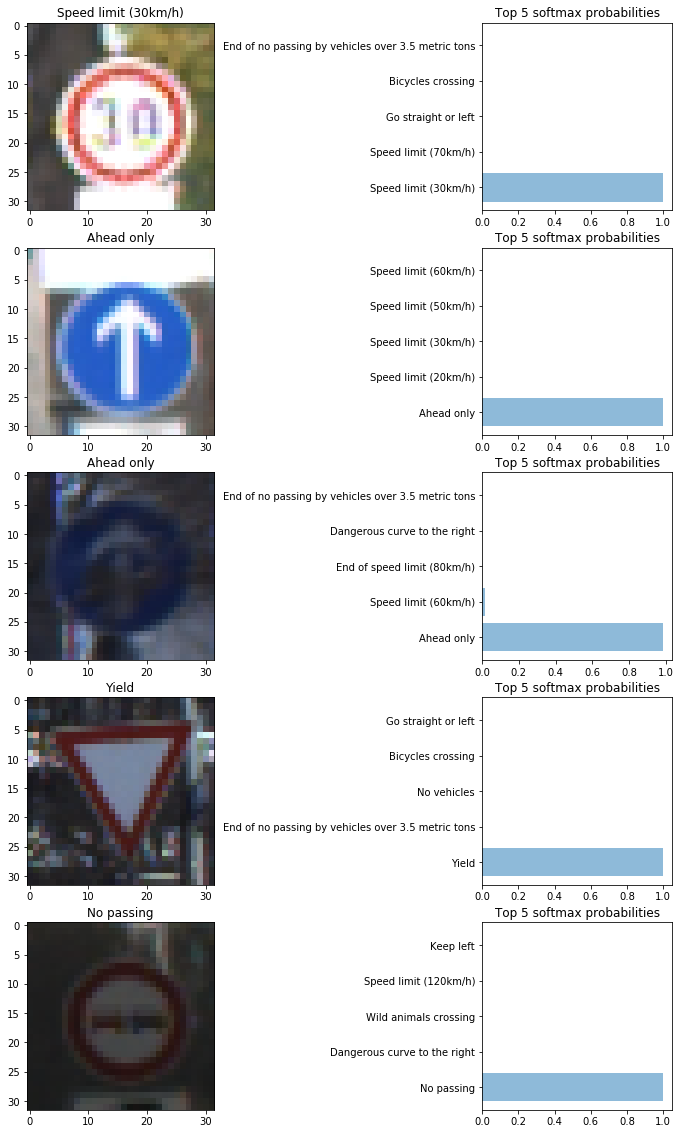

In [70]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20), gridspec_kw = {'width_ratios':[3, 1]})
for i in range(5):
    idx = indices[i]
    gplot, bplot = axes[i, 0], axes[i, 1]
    
    img, name = X_test[idx, ...], id2name[y_test[idx]]        
    gplot.imshow(img)
    gplot.set_title(name)
    
    labels = [id2name[cid] for cid in cids[i, ...]]
    y_pos = np.arange(len(labels))
    bplot.barh(y_pos, values[i], align='center', alpha=0.5)
    bplot.set_yticks(y_pos)
    bplot.set_yticklabels(labels)
    bplot.set_title('Top 5 softmax probabilities')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")